<a href="https://colab.research.google.com/github/ginzburg1991/wine_predictions_complex_machine_learning_models/blob/main/wine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**

The business problem I am attempting to solve is to predict which 3 specific regions the wine originated from. We will do this by making 14 different models and seeing which one is most accurate in predicting the wine's region based on the wine's chemical composition. We will use four types of ensemble models: bagging, boosting, stacked model for multiple models, and stacking using grid search cross-validation. The fourteen models that we will be making will be four baselines (Random Forest,  kNN,  SVC, Logistic Regression) models, 4 bagging (Random Forest,  kNN,  SVC, Logistic Regression) models, 4 boosting ('Ada Boost,' 'Gradient Boost,' 'XG Boost,' 'Ensemble') models, 1 stacked model of a (Random Forest,  kNN,  SVC, Logistic Regression input into a Logistic Regression meta-classifier) using both probability and class labels, and 1 stacked model w/ Grid Search Cross Validation hyperparameters(RandomForestClassifier, KNeighbors Classifier, Decision Tree Classifier, and LogisticRegression). The baseline for the code I will be using to accomplish these models is found here: https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674.

1. "Bagging: Bagging is mostly used to reduce the variance in a model. A simple example of bagging is the Random Forest algorithm.

2. Boosting: Boosting is mostly used to reduce the bias in a model. Examples of boosting algorithms are Ada-Boost, XGBoost, Gradient Boosted Decision Trees etc.

3. Stacking: Stacking is mostly used to increase the prediction accuracy of a model. For implementing stacking we will use the mlextend library provided by sci-kit learn.

4. Cascading: This class of models are very very accurate. Cascading is mostly used in scenarios where you cannot afford to make a mistake. For example, a cascading technique is mostly used to detect fraudulent credit card transactions, or maybe when you want to be absolutely sure that you don’t have cancer."

In [ ]:
!pip install mlxtend

In [ ]:
!pip install xgboost

In [ ]:
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from mlxtend.classifier import StackingClassifier

**Data**

This data is the results of a chemical analysis of wines grown in three different locations. There are 178 samples and [59, 71, and 48] samples per class. There are 13 variabels representing the characteristics of the wine. The thriteen vartibales are ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline']

In [ ]:
#wine data
wine = sklearn.datasets.load_wine(return_X_y=False, as_frame=False)
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

**EDA**

In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [ ]:
#summary of the data
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [ ]:
#rows and columns of the data
wine_df.shape

(178, 14)

In [ ]:
#checks for missing values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

No missing values

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


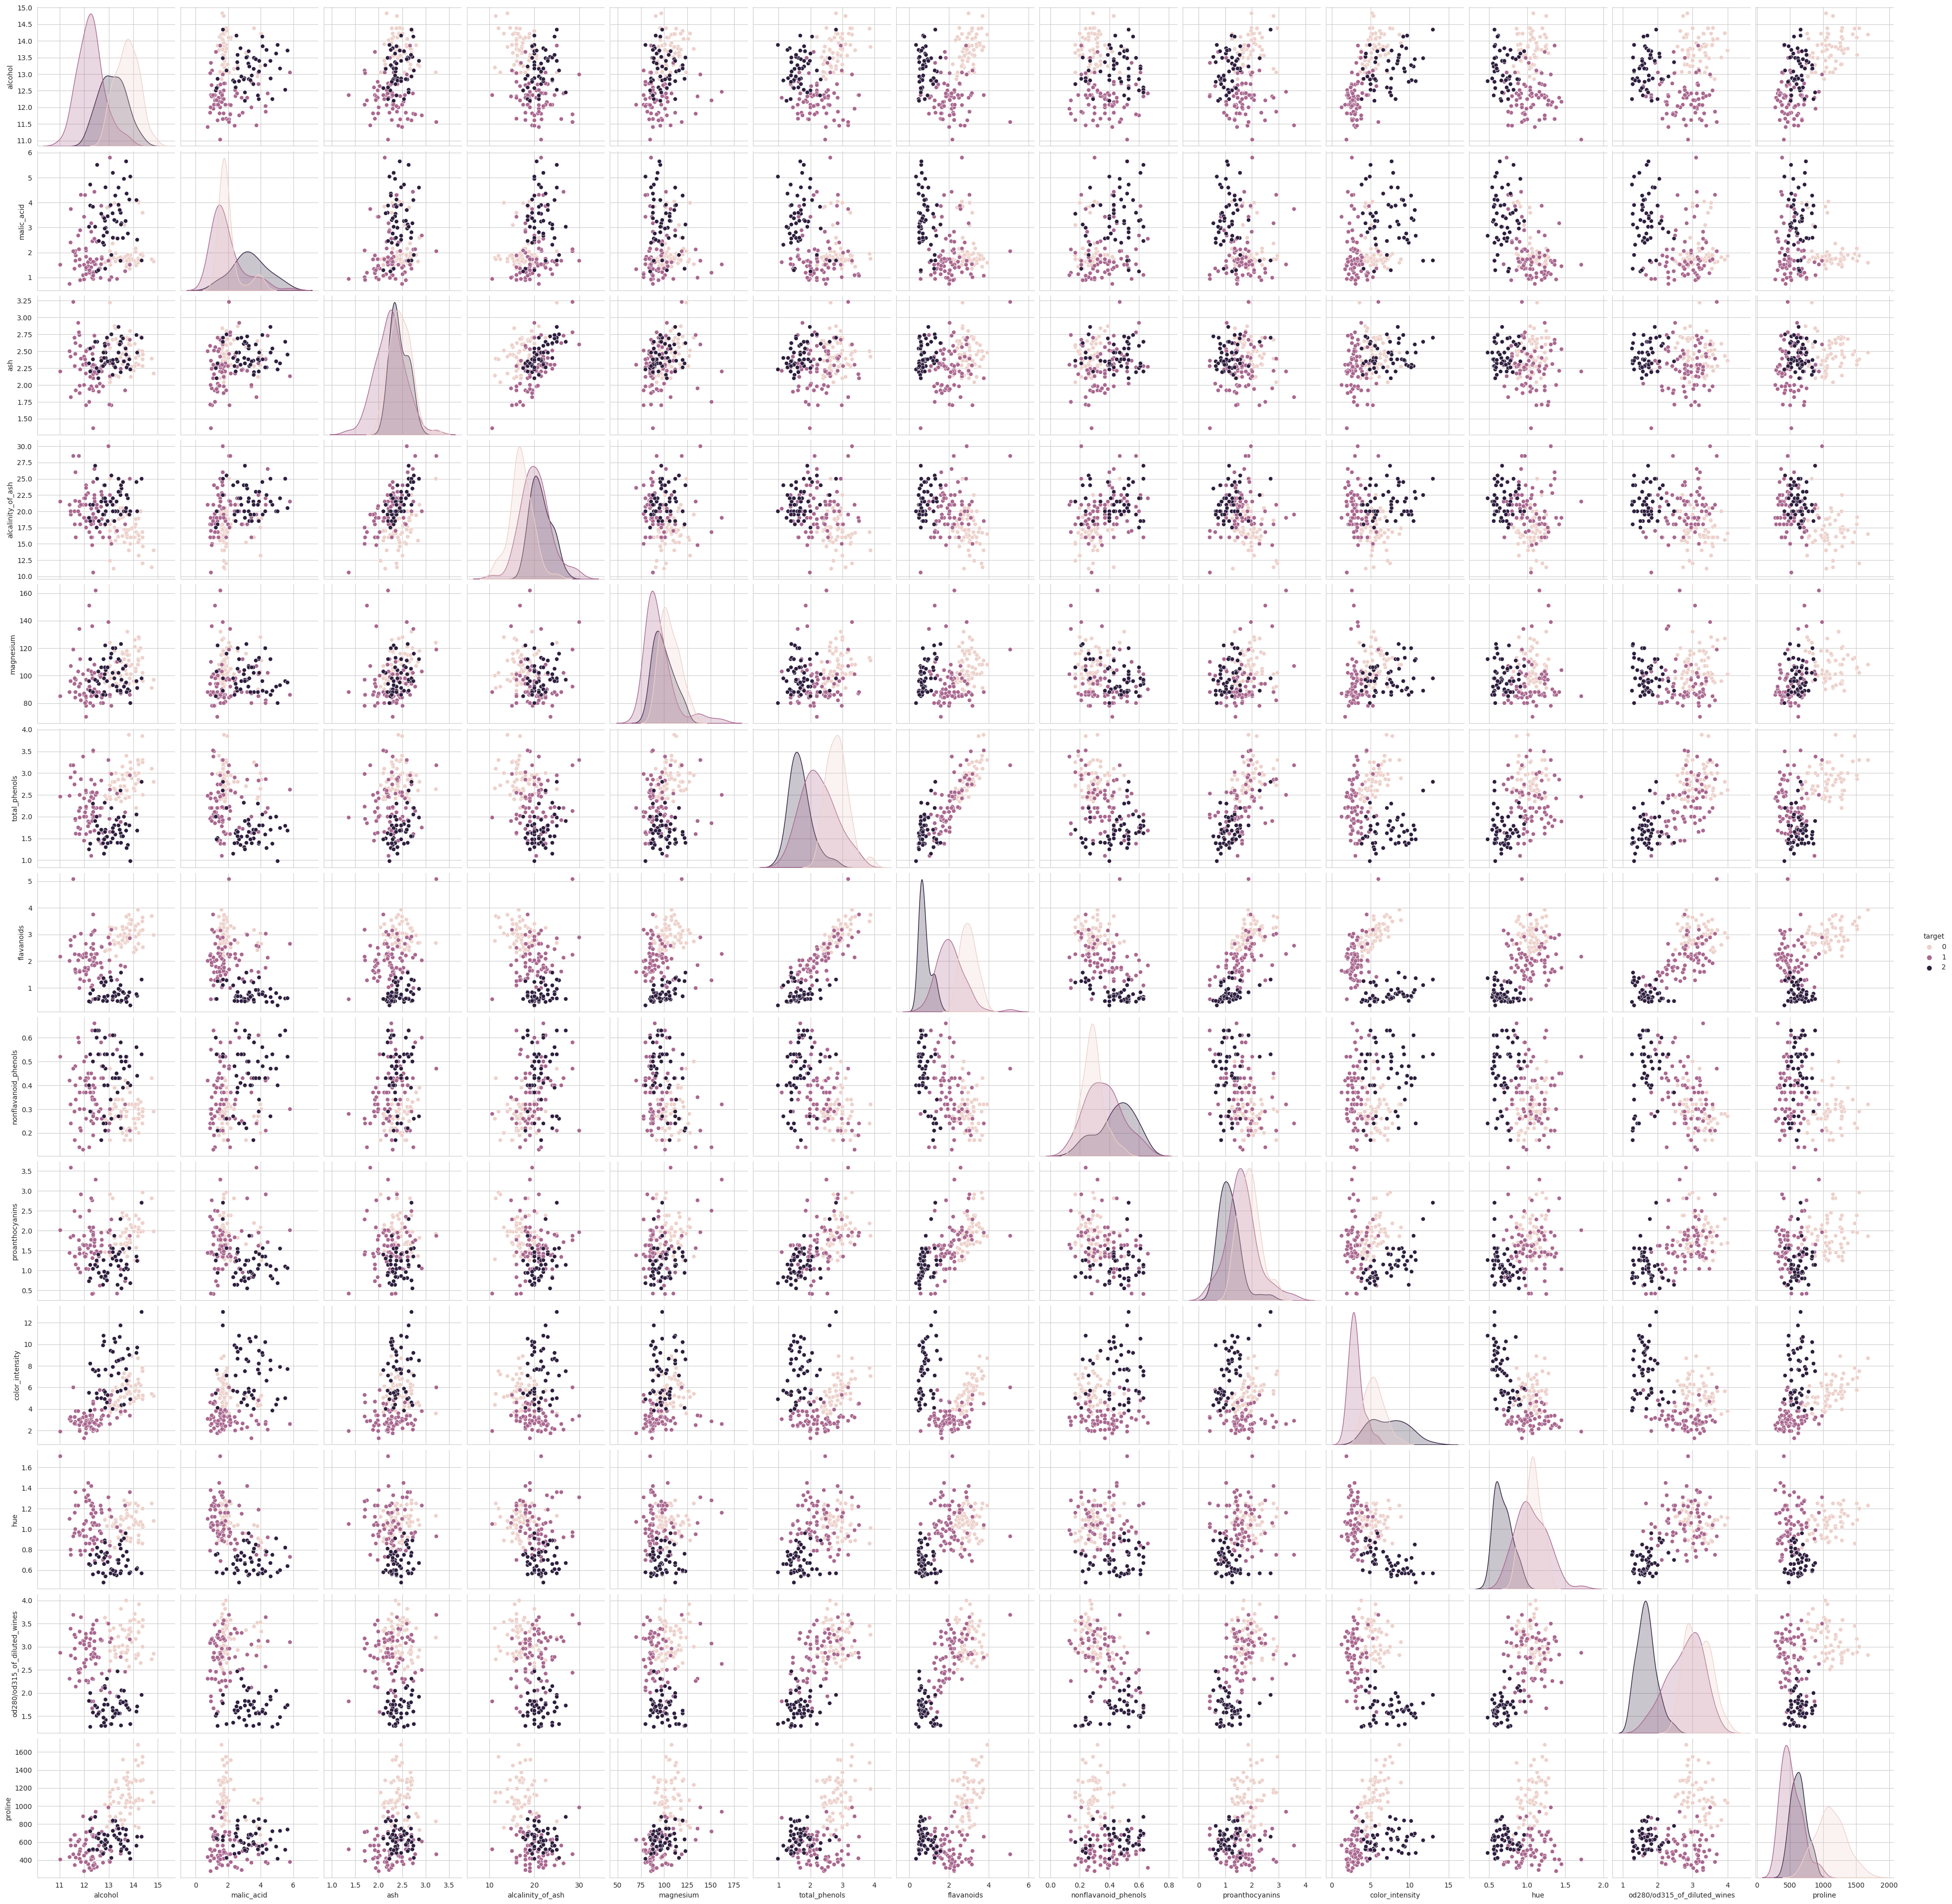

In [ ]:
#Sets a target that we want to predict and classify
wine_df['target'] = wine.target
X, y = wine_df.iloc[:,0:-1], wine['target']

#makes the pair plots
import seaborn as sns
plt.close();
sns.set_style("whitegrid");
sns.pairplot(wine_df, hue="target", size=3);
plt.show()


Each color represents a different location that the wine is from.

**Models**

In [ ]:
from sklearn.preprocessing import LabelEncoder
X, y = wine_df.iloc[:,0:-1], wine_df.iloc[:,-1]
RANDOM_SEED = 0
#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
classifier_array = [rf_clf, knn_clf, svc_clf, lr_clf]
labels = [clf.__class__.__name__ for clf in classifier_array]
normal_accuracy = []
normal_std = []
bagging_accuracy = []
bagging_std = []
for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)

    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))

    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))

    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.9046 (+/- 0.0442) [Normal RandomForestClassifier]
Accuracy: 0.8991 (+/- 0.0268) [Bagging RandomForestClassifier]

Accuracy: 0.6465 (+/- 0.0662) [Normal KNeighborsClassifier]
Accuracy: 0.9215 (+/- 0.0316) [Bagging KNeighborsClassifier]

Accuracy: 0.9273 (+/- 0.0476) [Normal SVC]
Accuracy: 0.9214 (+/- 0.0486) [Bagging SVC]

Accuracy: 0.9108 (+/- 0.0925) [Normal LogisticRegression]
Accuracy: 0.9159 (+/- 0.0475) [Bagging LogisticRegression]



I am performing a comparison between the performance of standard classifiers and their bagging ensembles. The accuracy seems to be similar to each other except for KNN which the bagging performs with a much higher accuracy of .9215 compared to .6465. On average the bagging ensembles are better than normal since it does a lot better job with KNN.

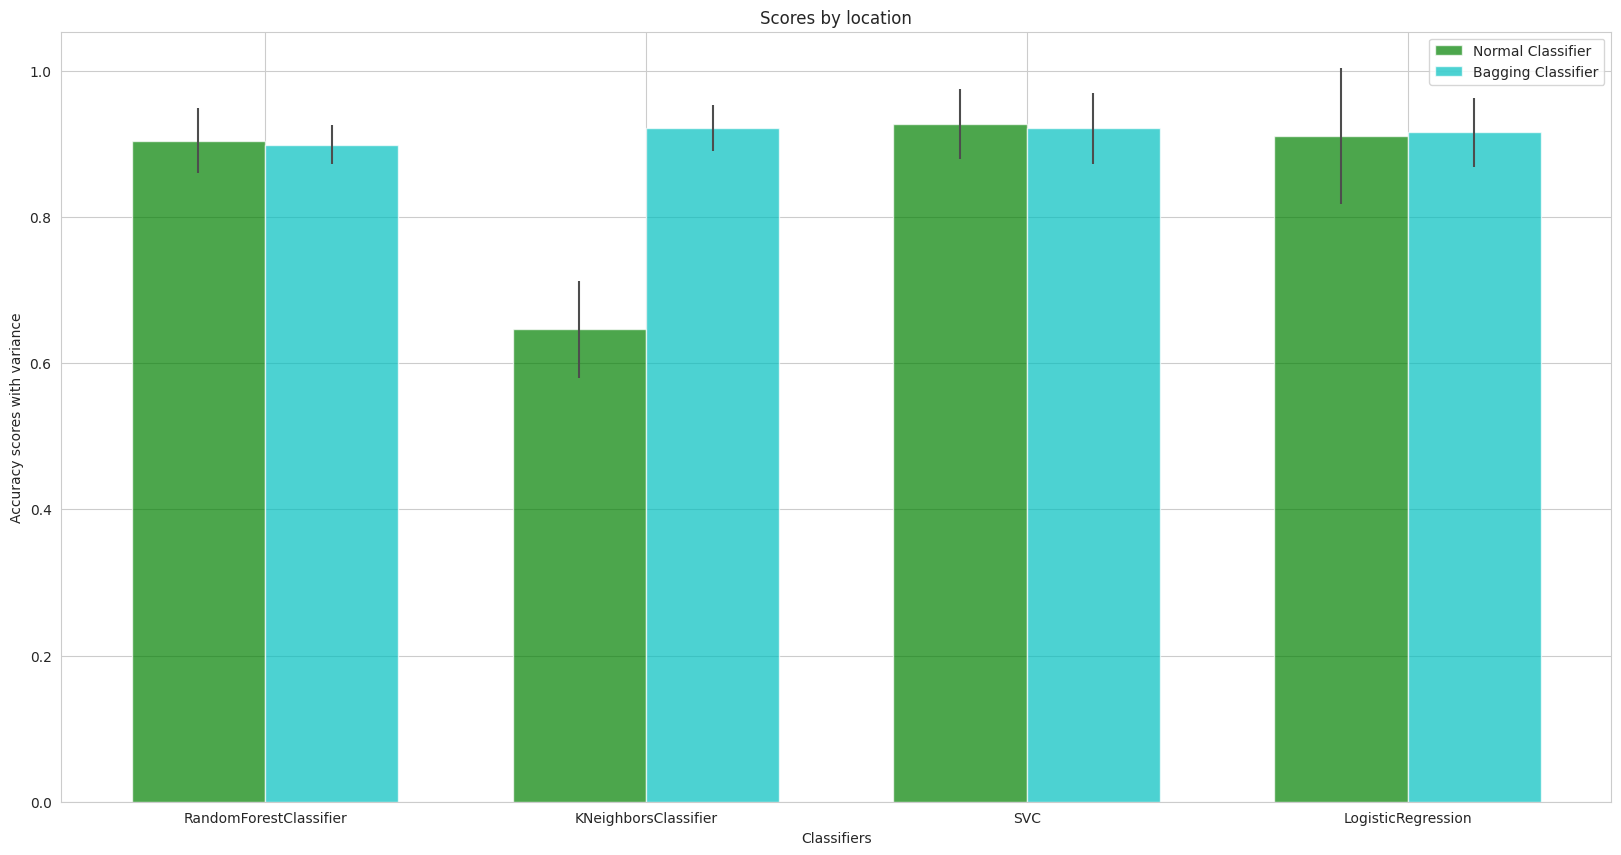

In [ ]:
#visualization
fig, ax = plt.subplots(figsize=(20,10))
n_groups = 4
index = np.arange(n_groups)
bar_width = 0.35
opacity = .7
error_config = {'ecolor': '0.3'}
normal_clf = ax.bar(index, normal_accuracy, bar_width, alpha=opacity, color='g', yerr=normal_std, error_kw=error_config, label='Normal Classifier')
bagging_clf = ax.bar(index + bar_width, bagging_accuracy, bar_width, alpha=opacity, color='c', yerr=bagging_std, error_kw=error_config, label='Bagging Classifier')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Scores by location')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()
#fig.tight_layout()
plt.show()

Visualization of the accuracy difference

In [ ]:
### Display the accuracy of different bagging classifiers at various sub sampling ratio in a Pretty table.
subsampling_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
various_bagging_scores = []
for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    #print("\nAccuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))

    mean_bagging_score = []
    for ratio in subsampling_ratio:
        bagging_clf = BaggingClassifier(clf, max_samples=ratio, max_features=3, random_state=RANDOM_SEED)
        bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
        mean_bagging_score.append(bagging_scores.mean())
        #print("Bagging accuracy: %0.4f [max_samples %0.2f]" % (bagging_scores.mean(), ratio))
    various_bagging_scores.append(mean_bagging_score)
various_bagging_scores.insert(0,subsampling_ratio)

#Compare performance and display it in a pretty table.
from prettytable import PrettyTable
table = PrettyTable()
labels.insert(0,"Max Samples")
#table.field_names = label_models
index=0
for value in various_bagging_scores:
    table.add_column(labels[index],value)
    index += 1
print(table)

+-------------+------------------------+----------------------+--------------------+--------------------+
| Max Samples | RandomForestClassifier | KNeighborsClassifier |        SVC         | LogisticRegression |
+-------------+------------------------+----------------------+--------------------+--------------------+
|     0.1     |   0.8706214689265538   |  0.8145009416195856  | 0.876647834274953  | 0.8988700564971751 |
|     0.2     |   0.9045197740112995   |  0.9047080979284369  | 0.921563088512241  | 0.8824858757062147 |
|     0.3     |   0.9047080979284369   |  0.9272128060263655  | 0.9382297551789077 | 0.9048022598870057 |
|     0.4     |   0.8990583804143126   |  0.9214689265536724  | 0.9213747645951035 | 0.9159133709981168 |
|     0.5     |   0.9214689265536724   |  0.9272128060263652  | 0.9271186440677966 | 0.9160075329566855 |
|     0.6     |   0.9157250470809792   |  0.921563088512241   | 0.9273069679849342 | 0.9048964218455744 |
|     0.7     |   0.9101694915254237   |  0.93

I evaluate the performance of the different bagging classifiers' performance with varying subsampling ratios on the dataset. I then display it in a table. As we can see by the table, just increasing the ratio doesn’t necessarily mean a better accuracy score.

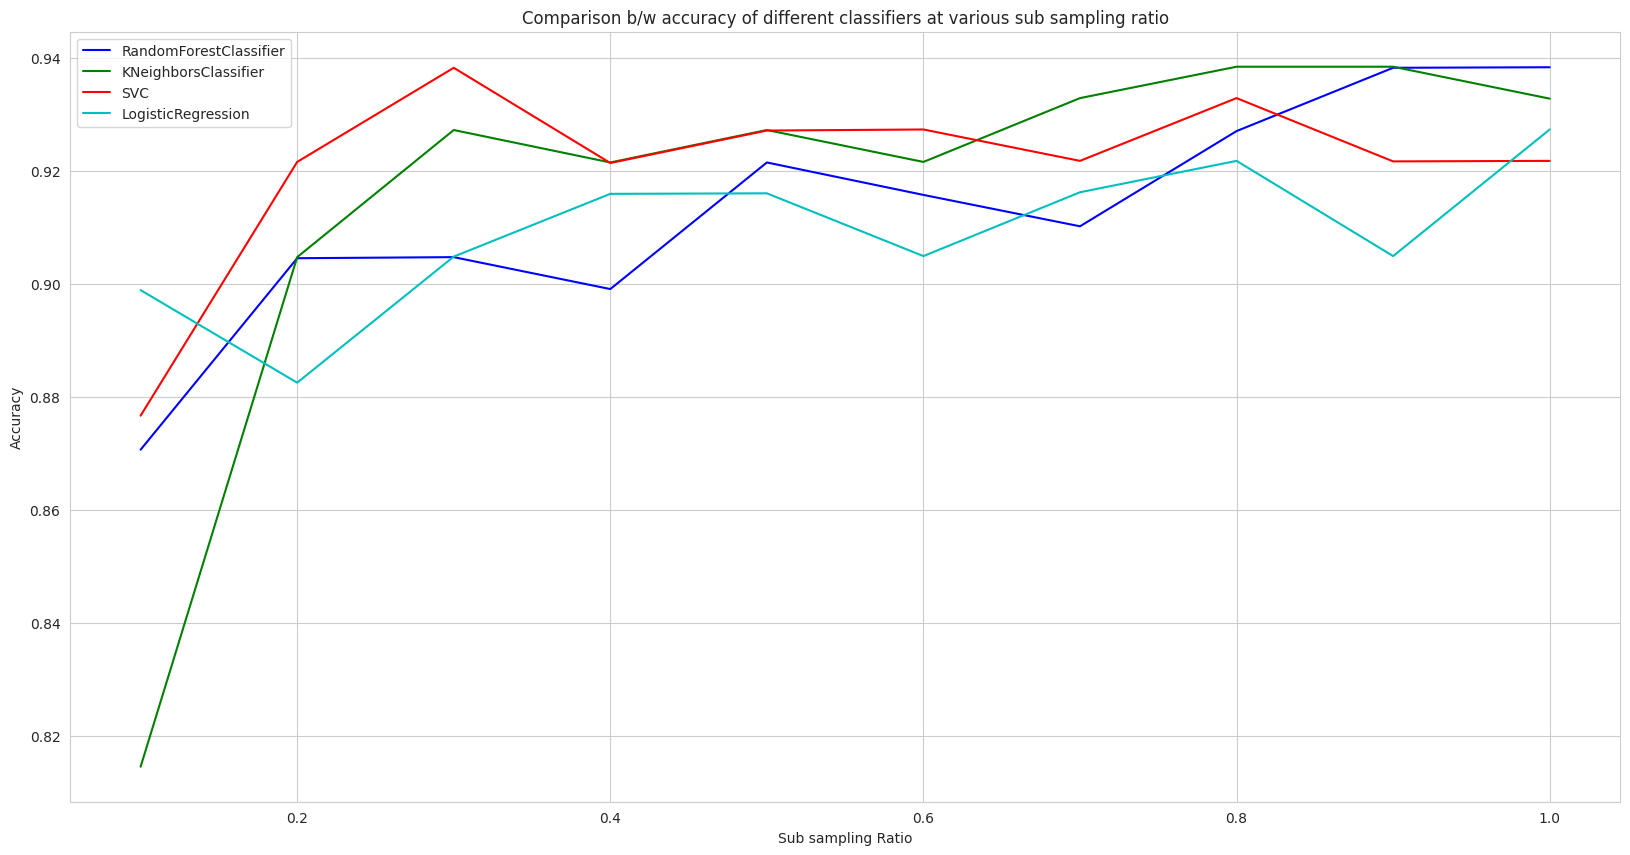

In [ ]:
#Plot the bagging scores using a line chart.
labels.remove("Max Samples")
various_bagging_scores.remove(various_bagging_scores[0])
x_axes = subsampling_ratio
color_map = ['blue','g','r','c','grey','y','black','m']
plt.figure(figsize=(20,10))
for index in range(0,len(labels)):
    plt.plot(x_axes, various_bagging_scores[index], color=color_map[index], label=labels[index])
plt.xlabel('Sub sampling Ratio')
plt.ylabel('Accuracy')
plt.title("Comparison b/w accuracy of different classifiers at various sub sampling ratio")
plt.legend()
plt.show()

Visualizing that increasing the sub sampling ratio doesn't always increase the accuracy score, but does help the accuracy score overall.

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)
ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.848, Variance: (+/-) 0.042 [Ada Boost]
Accuracy: 0.865, Variance: (+/-) 0.074 [Gradient Boost]
Accuracy: 0.876, Variance: (+/-) 0.071 [XG Boost]
Accuracy: 0.882, Variance: (+/-) 0.064 [Ensemble]


I compare the different boosting techniques described in the overview. The highest accuracy boosting came dfrom the Ensemble Boost.

In [ ]:
#selecting the two most important variable to use for the decision regions for all bossting algorthims
y_importance = wine.target
model = GradientBoostingClassifier()
model.fit(wine_df,y)

importances = model.feature_importances_

for feature, importance in zip(wine.feature_names, importances):
  print(str(feature) + " " + str(importance))


alcohol 1.7850078136683864e-05
malic_acid 0.04293780925761789
ash 0.0023263103247828125
alcalinity_of_ash 0.0011890348784831934
magnesium 0.0016733358823556618
total_phenols 2.6933695601755498e-05
flavanoids 0.0012560120066848065
nonflavanoid_phenols 0.00031516854796146977
proanthocyanins 4.394052827897486e-05
color_intensity 0.24405122496472795
hue 0.0011965728363282756
od280/od315_of_diluted_wines 0.001577556683604517
proline 0.010553019553560415


You can see that color_intensity and malic_acid are the two most important variables.

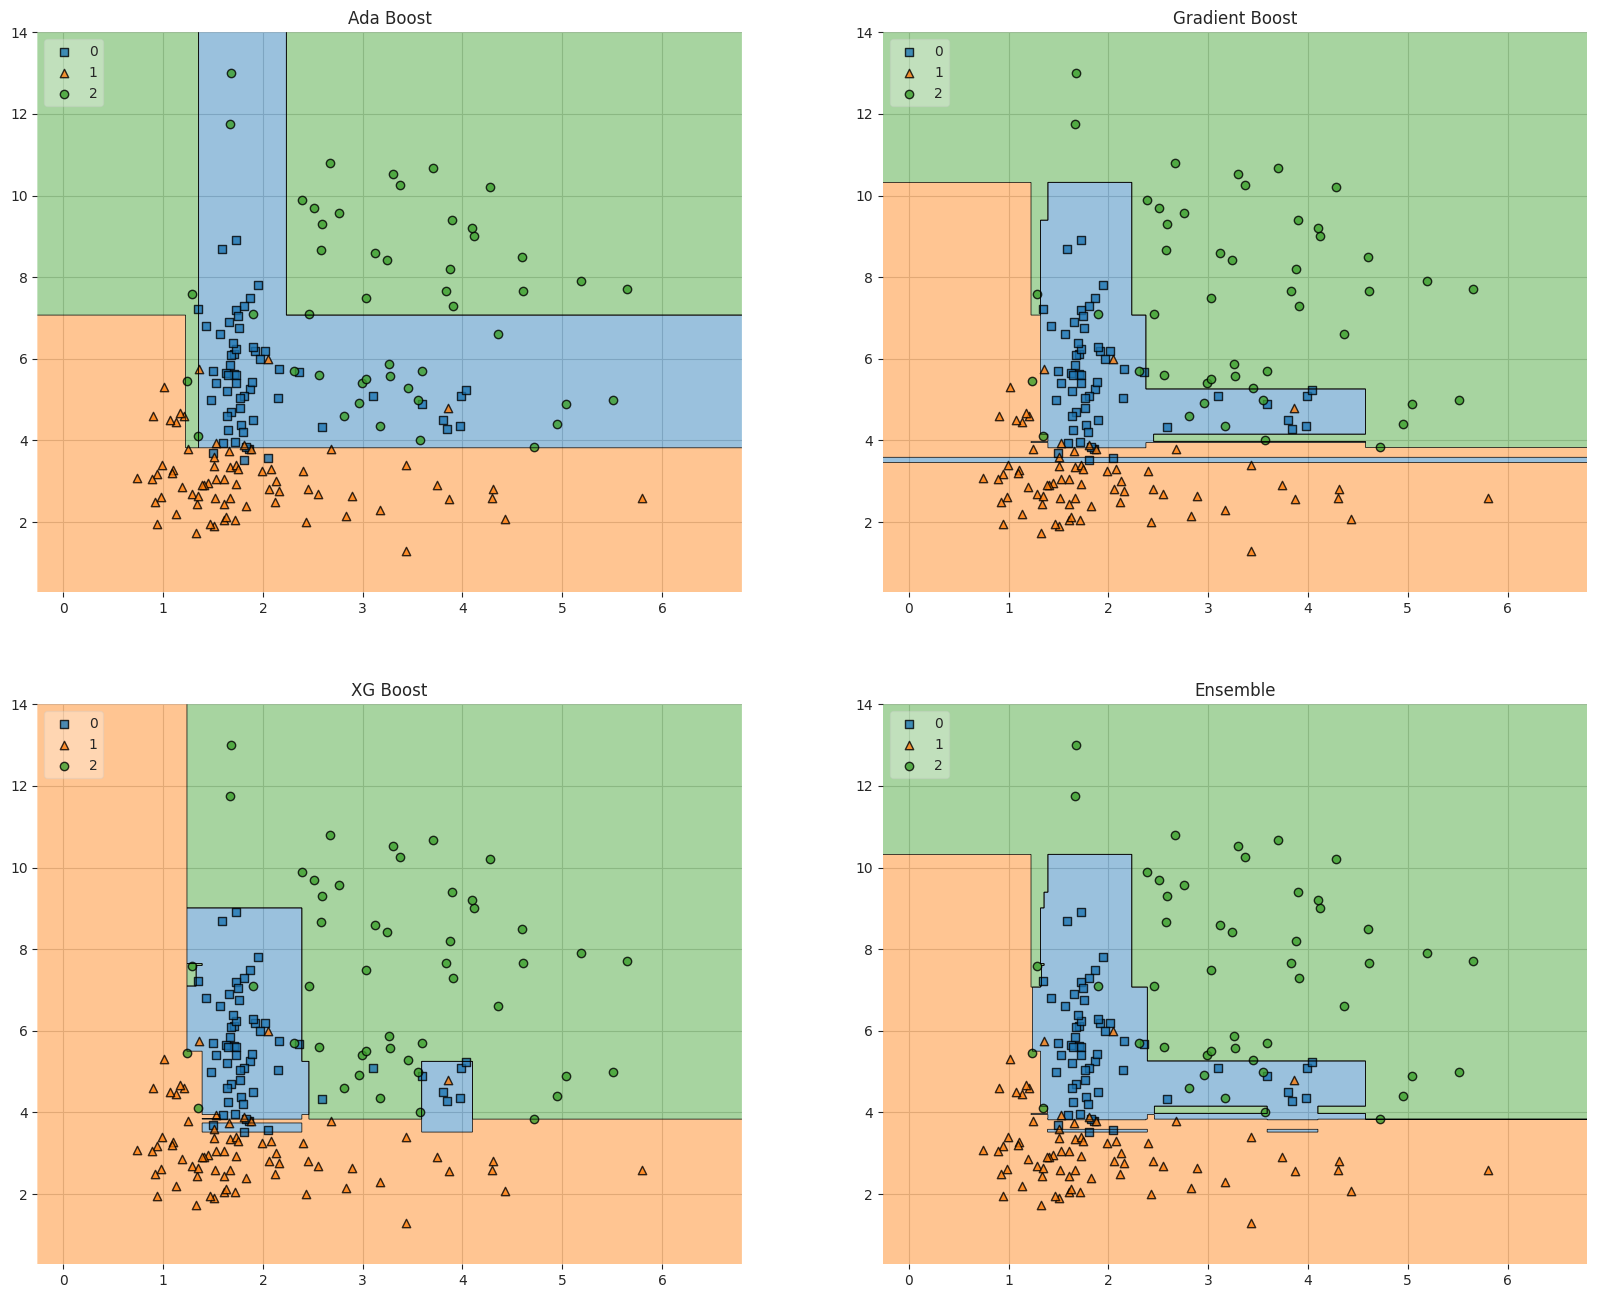

In [ ]:
#Decision Regions for all the boosting algorithms.
X = wine_df[['malic_acid',
  'color_intensity']].values

y = wine.target
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
plt.show()


Here you can visualize the decision regions of the four different boosting algorthims. It is clear from the visualization that Ensemble is the most accurate since the squares are mostly in the blue, the triangles are mostly in the orange, and the circles are mostly in the green. The different shapes represent the region.

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
RANDOM_SEED = 0
X, y = wine_df.iloc[:,0:-1], wine_df.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
rg_clf = RidgeClassifier(alpha=0.1, random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED, max_iter=1000)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000) # meta classifier
sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], meta_classifier=lr)
classifier_array = [rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]
acc_list = []
var_list = []
for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X_scaled, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    acc_list.append(np.round(cv_scores.mean(),4))
    var_list.append(np.round(cv_scores.std(),4))
    #print("Accuracy: {} (+/- {}) [{}]".format(np.round(scores.mean(),4), np.round(scores.std(),4), label))

Accuracy: 0.9046 (+/- 0.0442) [RandomForestClassifier]
Accuracy: 0.8879 (+/- 0.0553) [ExtraTreesClassifier]
Accuracy: 0.9272 (+/- 0.0310) [KNeighborsClassifier]
Accuracy: 0.9887 (+/- 0.0160) [SVC]
Accuracy: 0.9777 (+/- 0.0208) [RidgeClassifier]
Accuracy: 0.9720 (+/- 0.0208) [LogisticRegression]
Accuracy: 0.7864 (+/- 0.0168) [DecisionTreeClassifier]
Accuracy: 0.8651 (+/- 0.0147) [AdaBoostClassifier]
Accuracy: 0.9663 (+/- 0.0138) [StackingClassifier]


I am preforming cross validation analysis in order to measure the accuracy of the different classifiers. It seems as if SVC has the best accuracy, with .9887. You wwould excpect the stacking model to do the best but SVC, RidgeClassifier, and Logistical regression all beat it.

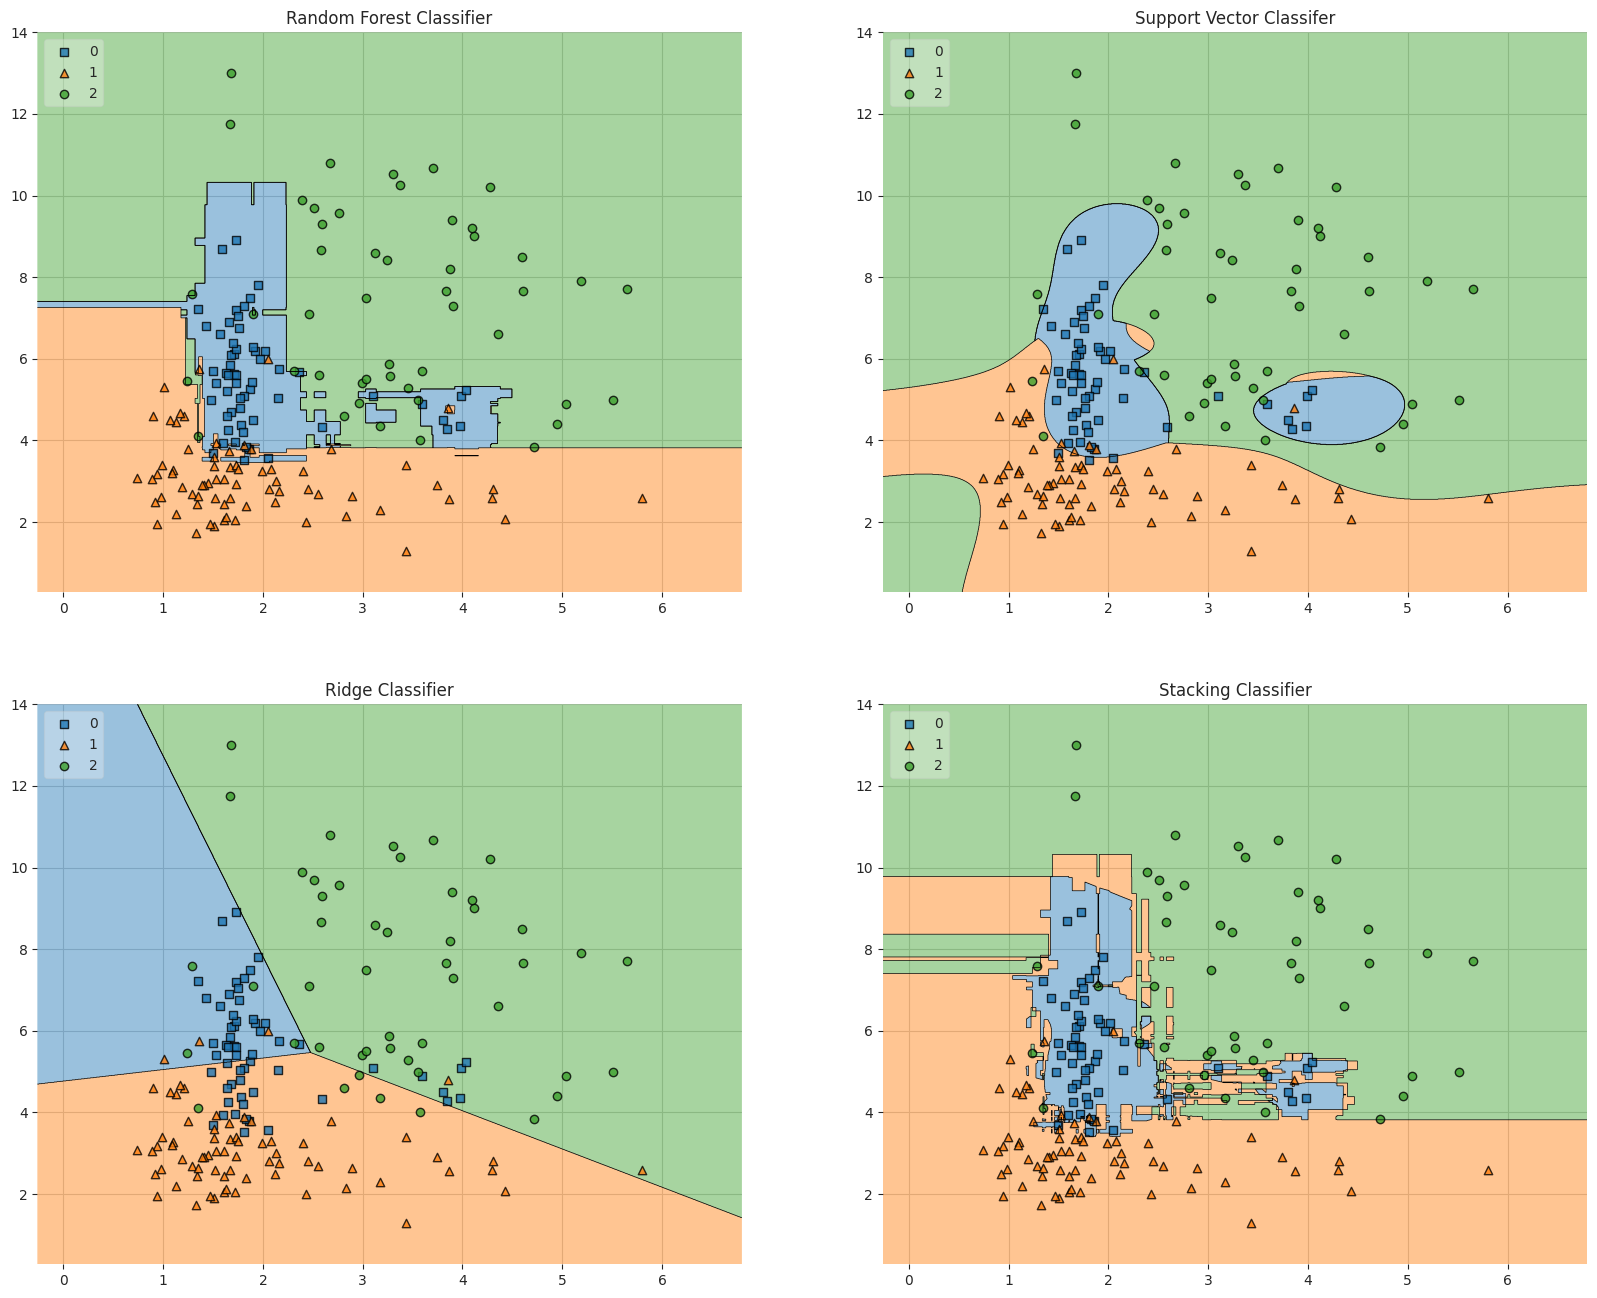

In [ ]:
#Decision Regions for 4 algorithms.
X = wine_df[['malic_acid',
  'color_intensity']].values
y = np.array(y)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([rf_clf, svc_clf, rg_clf, sclf], ["Random Forest Classifier", "Support Vector Classifer", "Ridge Classifier", "Stacking Classifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
plt.show()

Visualization of four classifiers from the last code snipet.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
RANDOM_SEED = 0
from sklearn.naive_bayes import GaussianNB
X, y = wine_df.iloc[:,0:-1], wine_df.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)
et_clf = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(n_neighbors=2)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED, max_iter=1000)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
adab_clf = AdaBoostClassifier(n_estimators=100)
lr = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000) # meta classifier
gnb_clf = GaussianNB()
#sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], use_probas=True, average_probas=False, meta_classifier=lr)
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, gnb_clf, lr_clf, et_clf, dt_clf, adab_clf], use_probas=True, average_probas=False, meta_classifier=lr)
classifier_array = [rf_clf, knn_clf, gnb_clf, lr_clf, et_clf, dt_clf, adab_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]
for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X_scaled, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))

Accuracy: 0.9046 (+/- 0.0442) [RandomForestClassifier]
Accuracy: 0.9272 (+/- 0.0310) [KNeighborsClassifier]
Accuracy: 0.9607 (+/- 0.0076) [GaussianNB]
Accuracy: 0.9720 (+/- 0.0208) [LogisticRegression]
Accuracy: 0.8879 (+/- 0.0553) [ExtraTreesClassifier]
Accuracy: 0.7864 (+/- 0.0168) [DecisionTreeClassifier]
Accuracy: 0.8651 (+/- 0.0147) [AdaBoostClassifier]
Accuracy: 0.9664 (+/- 0.0135) [StackingClassifier]


This one does the same thing except it uses probilities which results in a little bit better accuracy score for the stacking.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegresion
RANDOM_SEED = 0
X, y = wine_df.iloc[:,0:-1], wine_df.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Base Learners.
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED,n_jobs=-1)
knn_clf = KNeighborsClassifier(p=2, metric='minkowski',n_jobs=-1)
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_SEED)
lr = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000) # meta classifier
#sclf = StackingClassifier(classifiers=[rf_clf, et_clf, knn_clf, svc_clf, rg_clf, lr_clf, dt_clf, adab_clf], meta_classifier=lr)
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, dt_clf], meta_classifier=lr)
print("\nAccuracies of all classifiers using grid search cross validation.")
params = {'randomforestclassifier__n_estimators': np.arange(10,20),
          'randomforestclassifier__max_depth': np.arange(1,5),
          'kneighborsclassifier__n_neighbors': np.arange(1,20,2),
          'decisiontreeclassifier__max_depth': np.arange(1,5),
          'meta_classifier__C': [0.001,0.01,0.1,1,10,100,1000]}
gsearch_cv = GridSearchCV(estimator=sclf, param_grid=params, cv=5, refit=True)
gsearch_cv.fit(X_scaled, y)
cv_keys = ('mean_test_score', 'std_test_score', 'params')
print('Best parameters: %s' % gsearch_cv.best_params_)
print('Accuracy: %.2f' % gsearch_cv.best_score_)


Accuracies of all classifiers using grid search cross validation.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'decisiontreeclassifier__max_depth': 3, 'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__max_depth': 1, 'randomforestclassifier__n_estimators': 17}
Accuracy: 0.99


This is the best accuracy we've seen yet!!! I executed a grid search cross-validation to find the best hyperparameters for a stacking classifier and to evaluate its performance on the scaled wine dataset. With this model I get an accuracy of .99. Almost coudn't be any higher. This is because it combines a lot of the other classifier techniques and uses them all to get the best accuracy.

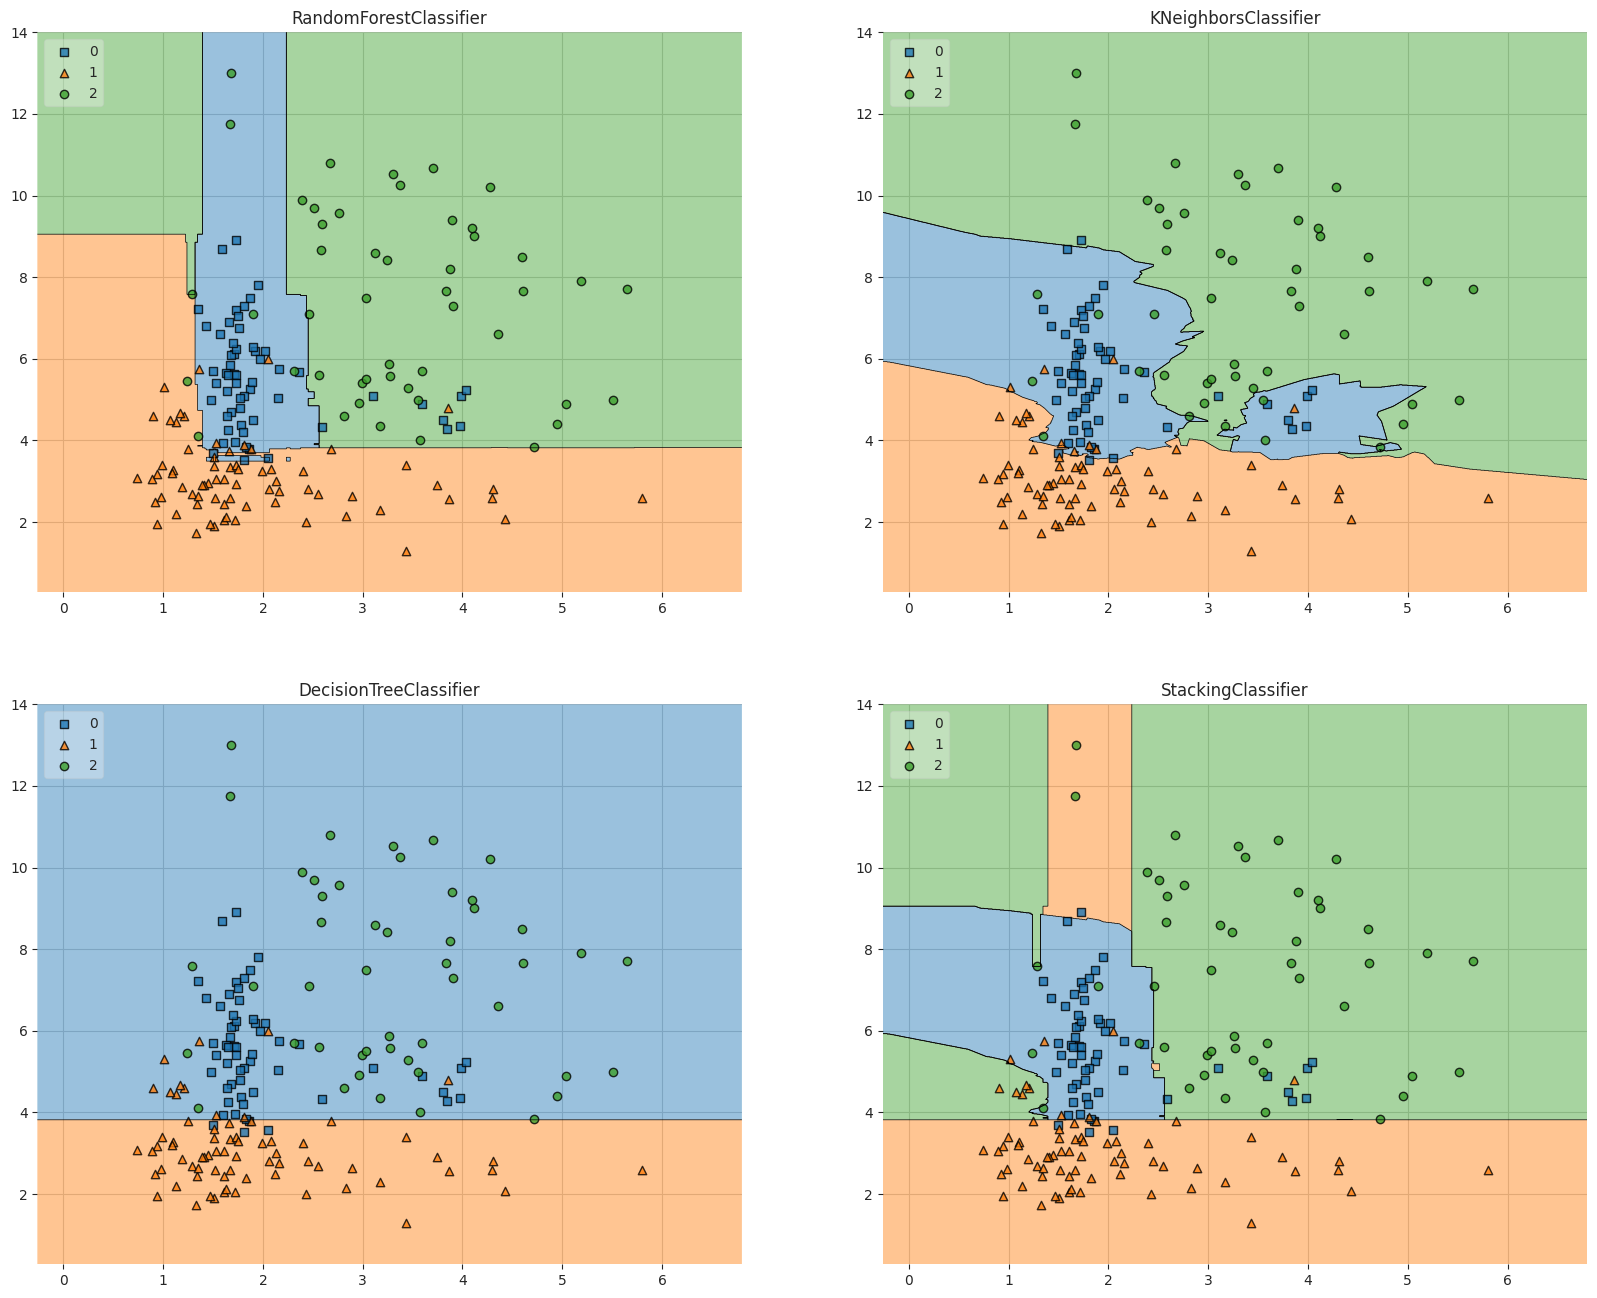

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
#Decision Regions for 4 algorithms.
X = wine_df[['malic_acid',
  'color_intensity']].values
y = np.array(y)
#Base Learners.
rf_clf = RandomForestClassifier(max_depth=3,n_estimators=15,random_state=RANDOM_SEED,n_jobs=-1)
knn_clf = KNeighborsClassifier(n_neighbors=7,p=2, metric='minkowski',n_jobs=-1)
dt_clf = DecisionTreeClassifier(max_depth=1,criterion='gini', random_state=RANDOM_SEED)
lr = LogisticRegression(C=0.1,random_state=RANDOM_SEED) # meta classifier
sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, dt_clf], meta_classifier=lr)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([rf_clf, knn_clf, dt_clf, sclf], ["RandomForestClassifier", "KNeighborsClassifier", "DecisionTreeClassifier", "StackingClassifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
plt.show()

Vissualization of some more classifications.

**Conclusion**

In conclusion, The grid search cross-validation model had the highest accuracy in predicting which Wine came from which region based on their chemical compound. However, this took about 2.5 hours to finish running, and it only increased the accuracy by one percent when compared to the normal cross-validation of the SVC model. Is it really worth the computation power and time needed for just a 1 percent increase in accuracy when it comes to wine? Probably not, but there are scenarios where it makes sense to be accurate. For example, when knowing if a person has cancer or making sure a missile hits an asteroid. Really, if there are lives on the line. However, the grid search cross-validation was the most accurate out of the different techniques and models, and I can confidently tell with 99 percent accuracy where the wine came from.